<a href="https://colab.research.google.com/github/ahwarkhan/DL-IID/blob/main/CICIoMT2024__DL_IID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1223b919809557edf0bf33188fb47051ca1ab0f699a92bc1f86d062fb62567b3
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import psutil
import time
import random
import math
import lime
import lime.lime_tabular

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/research_paper/dataset3/CIC_IoMT_2024.csv')

In [ ]:
dataset.describe().T

count          mean           std     min           25%  \
Header_Length    1614182.0  3.162210e+04  3.079715e+05   0.000  0.000000e+00   
Protocol Type    1614182.0  8.066041e+00  6.360535e+00   0.000  1.000000e+00   
Duration         1614182.0  6.415085e+01  4.642660e+00   0.000  6.400000e+01   
Rate             1614182.0  1.801793e+04  4.207531e+04   0.000  5.883431e+00   
Srate            1614182.0  1.801793e+04  4.207531e+04   0.000  5.883431e+00   
Drate            1614182.0  0.000000e+00  0.000000e+00   0.000  0.000000e+00   
fin_flag_number  1614182.0  5.317376e-03  3.436533e-02   0.000  0.000000e+00   
syn_flag_number  1614182.0  1.503382e-01  3.280260e-01   0.000  0.000000e+00   
rst_flag_number  1614182.0  4.349757e-02  1.485932e-01   0.000  0.000000e+00   
psh_flag_number  1614182.0  2.116885e-02  9.383889e-02   0.000  0.000000e+00   
ack_flag_number  1614182.0  1.013417e-01  2.561433e-01   0.000  0.000000e+00   
ece_flag_number  1614182.0  5.352556e-06  7.078350e-04   0.000  0.000000e+00   
cwr_flag_number  1614182.0  3.215251e-06  5.227382e-04   0.000  0.000000e+00   
ack_count        1614182.0  2.818680e-02  1.810694e-01   0.000  0.000000e+00   
syn_count        1614182.0  2.863306e-01  5.955145e-01   0.000  0.000000e+00   
fin_count        1614182.0  7.119607e-02  2.763712e-01   0.000  0.000000e+00   
rst_count        1614182.0  5.083276e+01  4.280773e+02   0.000  0.000000e+00   
HTTP             1614182.0  2.028755e-03  4.463870e-02   0.000  0.000000e+00   
HTTPS            1614182.0  2.666251e-03  3.703460e-02   0.000  0.000000e+00   
DNS              1614182.0  1.274241e-04  4.273119e-03   0.000  0.000000e+00   
Telnet           1614182.0  7.607568e-06  5.569491e-04   0.000  0.000000e+00   
SMTP             1614182.0  7.607568e-06  5.569491e-04   0.000  0.000000e+00   
SSH              1614182.0  7.637305e-05  5.833567e-03   0.000  0.000000e+00   
IRC              1614182.0  7.669519e-06  5.624824e-04   0.000  0.000000e+00   
TCP              1614182.0  4.083290e-01  4.893098e-01   0.000  0.000000e+00   
UDP              1614182.0  3.140620e-01  4.624434e-01   0.000  0.000000e+00   
DHCP             1614182.0  6.814597e-07  2.468993e-04   0.000  0.000000e+00   
ARP              1614182.0  6.785041e-04  1.762660e-02   0.000  0.000000e+00   
ICMP             1614182.0  2.769218e-01  4.469698e-01   0.000  0.000000e+00   
IGMP             1614182.0  3.809979e-06  1.016253e-03   0.000  0.000000e+00   
IPv              1614182.0  9.993215e-01  1.762661e-02   0.000  1.000000e+00   
LLC              1614182.0  9.993215e-01  1.762661e-02   0.000  1.000000e+00   
Tot sum          1614182.0  6.242821e+02  1.003557e+03  42.000  4.410000e+02   
Min              1614182.0  5.532503e+01  7.539111e+01  42.000  4.200000e+01   
Max              1614182.0  6.826243e+01  1.244830e+02  42.000  4.200000e+01   
AVG              1614182.0  5.946788e+01  8.795577e+01  42.000  4.200000e+01   
Std              1614182.0  4.529111e+00  3.260722e+01   0.000  0.000000e+00   
Tot size         1614182.0  5.947446e+01  8.787085e+01  42.000  4.200000e+01   
IAT              1614182.0  8.468452e+07  1.752676e+07   0.000  8.467918e+07   
Number           1614182.0  9.499108e+00  8.277112e-01   1.000  9.500000e+00   
Magnitue         1614182.0  1.038493e+01  3.107916e+00   9.164  9.164000e+00   
Radius           1614182.0  6.397974e+00  4.610123e+01   0.000  0.000000e+00   
Covariance       1614182.0  1.639988e+03  1.627754e+04   0.000  0.000000e+00   
Variance         1614182.0  8.745626e-02  2.341264e-01   0.000  0.000000e+00   
Weight           1614182.0  1.414799e+02  2.130564e+01   1.000  1.415000e+02   

                          50%           75%           max  
Header_Length    8.554000e+01  1.862700e+04  9.896704e+06  
Protocol Type    6.000000e+00  1.700000e+01  1.700000e+01  
Duration         6.400000e+01  6.400000e+01  2.550000e+02  
Rate             5.995513e+01  2.386662e+04  2.097152e+06  
Srate            5.995513e+01  2.386662e

In [ ]:
dataset.head()

Header_Length  Protocol Type  Duration        Rate       Srate  Drate  \
0         2525.0           17.0      64.0  190424.250  190424.250      0   
1         7525.0           17.0      64.0   30811.365   30811.365      0   
2         7659.5           17.0      64.0  130358.820  130358.820      0   
3         4375.0           17.0      64.0   22628.230   22628.230      0   
4         9375.0           17.0      64.0   21570.293   21570.293      0   

   fin_flag_number  syn_flag_number  rst_flag_number  psh_flag_number  ...  \
0              0.0              0.0              0.0              0.0  ...   
1              0.0              0.0              0.0              0.0  ...   
2              0.0              0.0              0.0              0.0  ...   
3              0.0              0.0              0.0              0.0  ...   
4              0.0              0.0              0.0              0.0  ...   

   Std  Tot size          IAT  Number  Magnitue  Radius  Covariance  Variance  \
0  0.0      50.0  101615016.0     9.5      10.0     0.0         0.0       0.0   
1  0.0      50.0   84679176.0     9.5      10.0     0.0         0.0       0.0   
2  0.0      50.0   84679176.0     9.5      10.0     0.0         0.0       0.0   
3  0.0      50.0   84679176.0     9.5      10.0     0.0         0.0       0.0   
4  0.0      50.0   84679176.0     9.5      10.0     0.0         0.0       0.0   

   Weight                label  
0   141.5  TCP_IP-DoS-UDP_test  
1   141.5  TCP_IP-DoS-UDP_test  
2   141.5  TCP_IP-DoS-UDP_test  
3   141.5  TCP_IP-DoS-UDP_test  
4   141.5  TCP_IP-DoS-UDP_test  

[5 rows x 46 columns]

In [ ]:
dataset.shape

(1614182, 46)

In [ ]:
dataset.isnull().sum()

Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
dataset.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [ ]:
dataset['label'].value_counts()

label
TCP_IP-DDoS-UDP1_test           205654
TCP_IP-DDoS-ICMP2_test          195692
TCP_IP-DDoS-TCP_test            182598
TCP_IP-DDoS-SYN_test            172397
TCP_IP-DDoS-UDP2_test           156416
TCP_IP-DDoS-ICMP1_test          154007
TCP_IP-DoS-UDP_test             137553
TCP_IP-DoS-SYN_test              98595
TCP_IP-DoS-ICMP_test             98432
TCP_IP-DoS-TCP_test              82096
MQTT-DDoS-Connect_Flood_test     41916
Benign_test                      37607
Recon-Port_Scan_test             22622
MQTT-DoS-Publish_Flood_test       8505
MQTT-DDoS-Publish_Flood_test      8416
Recon-OS_Scan_test                3834
MQTT-DoS-Connect_Flood_test       3131
MQTT-Malformed_Data_test          1747
ARP_Spoofing_test                 1744
Recon-VulScan_test                1034
Recon-Ping_Sweep_test              186
Name: count, dtype: int64

In [ ]:
for column in dataset.columns:
  print(f"{column}: {dataset[column].nunique()}")

Header_Length: 191898
Protocol Type: 696
Duration: 1729
Rate: 856010
Srate: 856010
Drate: 1
fin_flag_number: 118
syn_flag_number: 193
rst_flag_number: 188
psh_flag_number: 189
ack_flag_number: 237
ece_flag_number: 5
cwr_flag_number: 5
ack_count: 307
syn_count: 535
fin_count: 858
rst_count: 10665
HTTP: 21
HTTPS: 129
DNS: 24
Telnet: 3
SMTP: 3
SSH: 12
IRC: 3
TCP: 131
UDP: 109
DHCP: 6
ARP: 67
ICMP: 112
IGMP: 9
IPv: 67
LLC: 67
Tot sum: 5738
Min: 3702
Max: 5177
AVG: 5089
Std: 12682
Tot size: 4916
IAT: 18851
Number: 82
Magnitue: 2583
Radius: 12372
Covariance: 164718
Variance: 257
Weight: 87
label: 21


In [ ]:
dataset['new_label'] = dataset['label'].copy()

for label in dataset['label'].unique():
  if label == 'Benign_test':
    dataset.loc[dataset['new_label'] == label, 'new_label'] = 'Benign'
  else:
    dataset.loc[dataset['new_label'] == label, 'new_label'] = 'DDoS'

In [ ]:
dataset['new_label'].value_counts()

new_label
DDoS      1576575
Benign      37607
Name: count, dtype: int64

In [ ]:
X = dataset.drop(['label', 'new_label'], axis=1)
y = dataset['new_label']

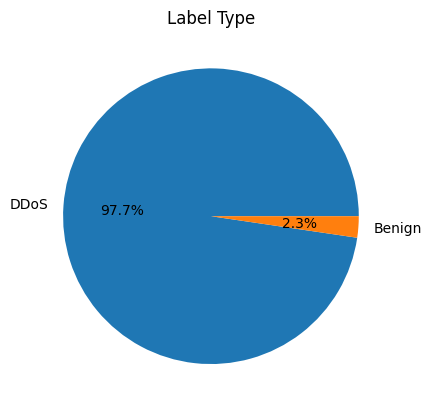

In [ ]:
graph_labels = 'DDoS', 'Benign'
graph_y = y.value_counts()
fig, ax = plt.subplots()
ax.pie(graph_y, labels=graph_labels, autopct='%1.1f%%')
plt.title('Label Type')
plt.show()

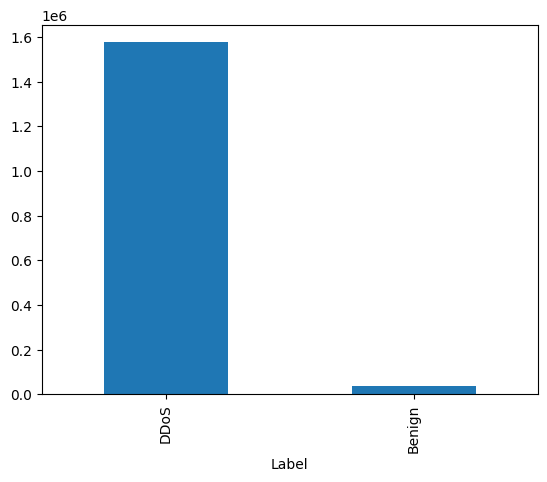

In [ ]:
graph_y.plot(kind='bar', xlabel='Label')
plt.show()

In [ ]:
X = X.replace([np.inf, -np.inf], np.nan)

In [ ]:
encoder = LabelEncoder()

for column in X.select_dtypes(include=['object']).columns:
  X[column] = encoder.fit_transform(X[column])
y = encoder.fit_transform(y)

In [ ]:
X.fillna(X.mean(), inplace=True)

In [ ]:
X.shape

(1614182, 45)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        assert len(self.X) == len(self.y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y[idx]
        return x, y

In [ ]:
train_dataset = MyDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = MyDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
val_dataset = MyDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### DNN-BiLSTM

In [ ]:
class DNNBiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, lstm_layers, output_size):
        super(DNNBiLSTM, self).__init__()

        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()

        self.lstm = nn.LSTM(input_size=64, hidden_size=hidden_size,
                            num_layers=lstm_layers, batch_first=True,
                            bidirectional=True)

        self.fc3 = nn.Linear(hidden_size * 2, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.float()
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = x.unsqueeze(1)
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]

        x = self.fc3(lstm_out)
        return self.softmax(x)

    def predict_proba(self, x):
      with torch.no_grad():
          x = torch.tensor(x, dtype=torch.float32)
          output = self.forward(x)
          probabilities = F.softmax(output, dim=1).numpy()
          return probabilities

In [ ]:
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss, correct_train, total_samples = 0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        train_loss = total_train_loss / len(train_loader)
        train_accuracy = (correct_train / total_samples) * 100

        # Validation Phase
        model.eval()
        total_val_loss, correct_val, total_val_samples = 0, 0, 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val_samples += labels.size(0)

        val_loss = total_val_loss / len(val_loader)
        val_accuracy = (correct_val / total_val_samples) * 100

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
              f"Train Acc: {train_accuracy:.2f}% | Val Acc: {val_accuracy:.2f}%")

    return train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
def plot_performance(train_losses, val_losses, train_acc, val_acc):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Loss Plot
    axes[0].plot(train_losses, label="Train Loss", color='blue')
    axes[0].plot(val_losses, label="Validation Loss", color='red')
    axes[0].set_title("Loss Curve")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    # Accuracy Plot
    axes[1].plot(train_acc, label="Train Accuracy", color='blue')
    axes[1].plot(val_acc, label="Validation Accuracy", color='red')
    axes[1].set_title("Accuracy Curve")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Accuracy (%)")
    axes[1].legend()

    plt.show()

In [ ]:
input_size = X_train.shape[1]
hidden_size = 64
lstm_layers = 1
output_size = 2
batch_size = 128
num_epochs = 20
learning_rate = 0.0001

In [ ]:
model = DNNBiLSTM(input_size, hidden_size, lstm_layers, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
train_losses, val_losses, train_acc, val_acc = train(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch 1/20 | Train Loss: 0.3308 | Val Loss: 0.3269 | Train Acc: 98.52% | Val Acc: 98.63%
Epoch 2/20 | Train Loss: 0.3189 | Val Loss: 0.3152 | Train Acc: 99.44% | Val Acc: 99.80%
Epoch 3/20 | Train Loss: 0.3152 | Val Loss: 0.3154 | Train Acc: 99.80% | Val Acc: 99.78%
Epoch 4/20 | Train Loss: 0.3151 | Val Loss: 0.3150 | Train Acc: 99.81% | Val Acc: 99.82%
Epoch 5/20 | Train Loss: 0.3151 | Val Loss: 0.3151 | Train Acc: 99.82% | Val Acc: 99.82%
Epoch 6/20 | Train Loss: 0.3150 | Val Loss: 0.3150 | Train Acc: 99.82% | Val Acc: 99.82%
Epoch 7/20 | Train Loss: 0.3150 | Val Loss: 0.3150 | Train Acc: 99.82% | Val Acc: 99.81%
Epoch 8/20 | Train Loss: 0.3150 | Val Loss: 0.3151 | Train Acc: 99.82% | Val Acc: 99.81%
Epoch 9/20 | Train Loss: 0.3149 | Val Loss: 0.3147 | Train Acc: 99.84% | Val Acc: 99.84%
Epoch 10/20 | Train Loss: 0.3146 | Val Loss: 0.3148 | Train Acc: 99.86% | Val Acc: 99.84%
Epoch 11/20 | Train Loss: 0.3146 | Val Loss: 0.3147 | Train Acc: 99.86% | Val Acc: 99.84%
Epoch 12/20 | Train

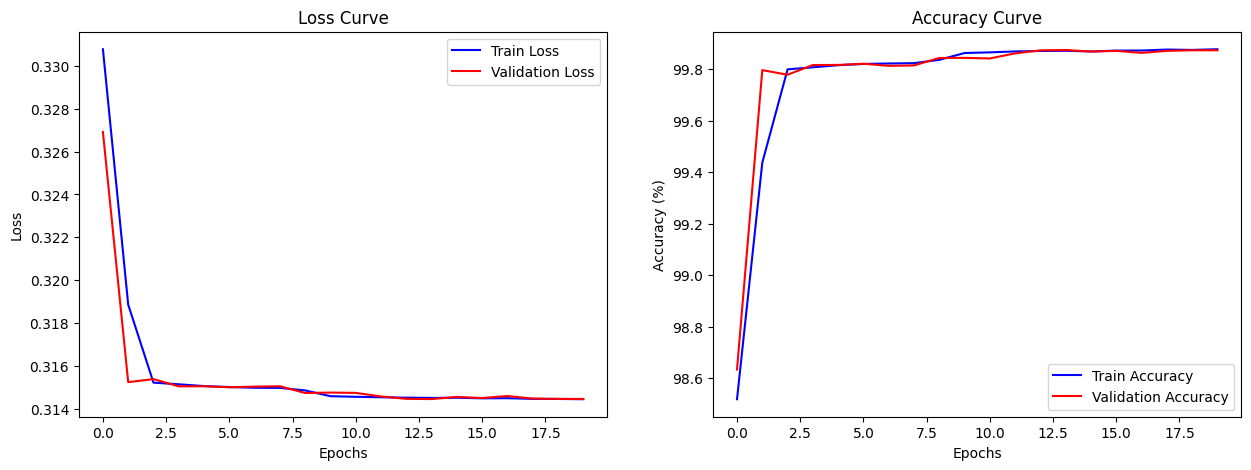

In [ ]:
plot_performance(train_losses, val_losses, train_acc, val_acc)

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    predictions = []
    labels = []

    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device, dtype=torch.float32), y.to(device, dtype=torch.long)
            outputs = model(x)
            loss = criterion(outputs, y)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y).sum().item()

            predictions.extend(predicted.cpu().numpy())
            labels.extend(y.cpu().numpy())

    # Convert to numpy arrays
    labels_array = np.array(labels)
    predictions_array = np.array(predictions)

    # Compute evaluation metrics
    accuracy = correct / len(test_loader.dataset)
    precision = precision_score(labels, predictions, zero_division=False)
    recall = recall_score(labels, predictions, zero_division=False)
    f1 = f1_score(labels, predictions, zero_division=False)

    # Compute error metrics
    MSE = mean_squared_error(labels_array, predictions_array)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(labels_array, predictions_array)

    safe_labels = np.where(labels_array == 0, np.nan, labels_array)
    MAPE = np.nanmean(np.abs((labels_array - predictions_array) / safe_labels)) * 100

    # System Resource Utilization
    process = psutil.Process()
    cpu_utilization = psutil.cpu_percent(interval=1)
    memory_usage = process.memory_info().rss / 1024  # Convert to KB

    # Print Results
    print("\n--- Evaluation Metrics ---")
    print(f"Test Loss: {test_loss / len(test_loader):.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\n--- Error Metrics ---")
    print(f"Mean Absolute Error (MAE): {MAE:.4f}")
    print(f"Mean Squared Error (MSE): {MSE:.4f}")
    print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {MAPE:.2f}%")

    print("\n--- System Resource Utilization ---")
    print(f"CPU Utilization: {cpu_utilization}%")
    print(f"Memory Usage: {memory_usage:.2f} KB")

    # Print Classification Report
    print("\n--- Classification Report ---")
    print(classification_report(labels, predictions, target_names=['Benign', 'DDoS']))

    # Plot Confusion Matrix
    conf_matrix = confusion_matrix(labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Benign', 'DDoS'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()


--- Evaluation Metrics ---
Test Loss: 0.3145
Test Accuracy: 0.9986
Precision: 0.9995
Recall: 0.9991
F1 Score: 0.9993

--- Error Metrics ---
Mean Absolute Error (MAE): 0.0014
Mean Squared Error (MSE): 0.0014
Root Mean Squared Error (RMSE): 0.0367
Mean Absolute Percentage Error (MAPE): 0.09%

--- System Resource Utilization ---
CPU Utilization: 3.0%
Memory Usage: 2588924.00 KB

--- Classification Report ---
              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97      7525
        DDoS       1.00      1.00      1.00    315312

    accuracy                           1.00    322837
   macro avg       0.98      0.99      0.99    322837
weighted avg       1.00      1.00      1.00    322837



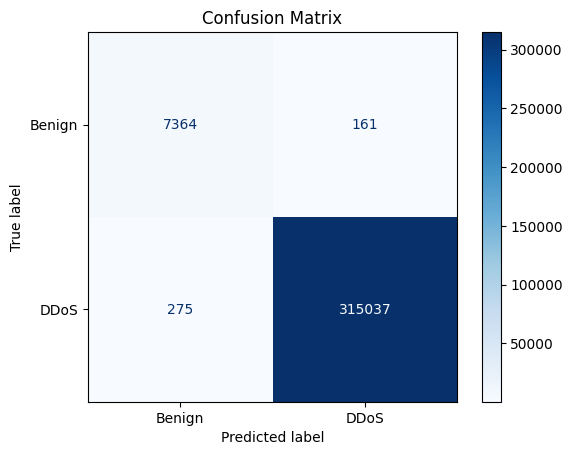

In [ ]:
evaluate_model(model, test_loader)

###Fitness (Objective) Function

In [ ]:
def train_on_selected_features(selected_features, X, y, epochs=50, batch_size=128):
    selected_features_indices = np.where(selected_features)[0]
    X_selected = X.iloc[:, selected_features_indices]

    scaler = StandardScaler()
    X_selected = scaler.fit_transform(X_selected)

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    train_dataset1 = MyDataset(X_train, y_train)
    train_loader1 = DataLoader(train_dataset1, batch_size=64, shuffle=True)
    val_dataset1 = MyDataset(X_val, y_val)
    val_loader1 = DataLoader(val_dataset1, batch_size=64, shuffle=False)

    input_size = X_train.shape[1]
    hidden_size = 64
    lstm_layers = 1
    output_size = 2
    model = DNNBiLSTM(input_size, hidden_size, lstm_layers, output_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for batch in train_loader1:
            x, y = batch
            y = y.long()
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        model.eval()
        val_loss = 0
        correct = 0

        with torch.no_grad():
            for batch in val_loader1:
                x, y = batch
                y = y.long()
                outputs = model(x)
                loss = criterion(outputs, y)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == y).sum().item()

        accuracy = correct / len(val_dataset1)

        return 1 - accuracy

In [ ]:
class solution:
    def __init__(self):
        self.best = 0
        self.bestIndividual = []
        self.convergence = []
        self.optimizer = ""
        self.objfname = ""
        self.startTime = 0
        self.endTime = 0
        self.executionTime = 0
        self.lb = 0
        self.ub = 0
        self.dim = 0
        self.popnum = 0
        self.maxiers = 0

### GA

In [ ]:
def crossover(individualLength, parent1, parent2):
    crossover_point = random.randint(1, individualLength - 1)
    offspring1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
    offspring2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
    return offspring1, offspring2

In [ ]:
def mutation(individual, individualLength, lb, ub):
    mutationIndex = random.randint(0, individualLength - 1)
    individual[mutationIndex] = 1 - individual[mutationIndex]

In [ ]:
def pairSelection(population, scores, popSize):
    def rouletteWheelSelectionId(scores, popSize):
        total_fitness = sum(scores)
        normalized_scores = [score / total_fitness for score in scores]
        cumulative_probs = np.cumsum(normalized_scores)
        random_num = random.random()
        for i, cumulative_prob in enumerate(cumulative_probs):
            if random_num <= cumulative_prob:
                return i

    parent1Id = rouletteWheelSelectionId(scores, popSize)
    parent1 = population[parent1Id].copy()

    parent2Id = parent1Id
    while parent2Id == parent1Id:
        parent2Id = rouletteWheelSelectionId(scores, popSize)

    parent2 = population[parent2Id].copy()

    return parent1, parent2

In [ ]:
def mutatePopulaton(population, popSize, mutationProbability, keep, lb, ub):
    for i in range(keep, popSize):
        if random.random() < mutationProbability:
            mutation(population[i], len(population[i]), lb, ub)

In [ ]:
def sortPopulation(population, scores):
    sorted_indices = scores.argsort()
    population = population[sorted_indices]
    scores = scores[sorted_indices]
    return population, scores

In [ ]:
def crossoverPopulaton(population, scores, popSize, crossoverProbability, keep):
    newPopulation = np.zeros_like(population)
    newPopulation[:keep] = population[:keep]

    for i in range(keep, popSize, 2):
        parent1, parent2 = pairSelection(population, scores, popSize)
        individualLength = len(parent1)

        if random.random() < crossoverProbability:
            offspring1, offspring2 = crossover(individualLength, parent1, parent2)
        else:
            offspring1, offspring2 = parent1.copy(), parent2.copy()

        newPopulation[i] = offspring1
        if i + 1 < popSize:
            newPopulation[i + 1] = offspring2

    return newPopulation

In [ ]:
def clearDups(population, lb, ub):
    unique_population = np.unique(population, axis=0)
    num_duplicates = len(population) - len(unique_population)

    if num_duplicates > 0:
        random_individuals = np.random.randint(2, size=(num_duplicates, population.shape[1]))
        unique_population = np.vstack((unique_population, random_individuals))

    return unique_population

In [ ]:
def GA(objf, lb, ub, dim, popSize, iters):
    cp = 0.8
    mp = 0.05
    keep = 2
    s = solution()

    bestScore = float("inf")
    bestIndividual = None

    ga = np.random.randint(2, size=(popSize, dim))
    convergence_curve = np.zeros(iters)

    print('GA is optimizing "' + objf.__name__ + '" for feature selection')

    timerStart = time.time()
    s.startTime = time.strftime("%Y-%m-%d-%H-%M-%S")

    for l in range(iters):
        scores = np.array([objf(ind) for ind in ga])

        ga, scores = sortPopulation(ga, scores)

        if scores[0] < bestScore:
            bestScore = scores[0]
            bestIndividual = ga[0]

        convergence_curve[l] = bestScore

        if l % 1 == 0:
            print(f"Iteration {l + 1}, best fitness (error): {bestScore:.4f}")

        ga = crossoverPopulaton(ga, scores, popSize, cp, keep)
        mutatePopulaton(ga, popSize, mp, keep, lb, ub)
        ga = clearDups(ga, lb, ub)

    timerEnd = time.time()
    s.bestIndividual = bestIndividual
    s.bestScore = bestScore
    s.executionTime = timerEnd - timerStart
    s.convergence = convergence_curve
    s.optimizer = "GA"
    s.objfname = objf.__name__

    return s

In [ ]:
dim = X.shape[1]
lb = [0] * dim
ub = [1] * dim
popSize = 20
iters = 5

In [ ]:
ddos_rows = dataset[dataset['new_label'] == 'DDoS']
benign_rows = dataset[dataset['new_label'] == 'Benign']

ddos_sample = ddos_rows.sample(n=100000, random_state=42)

selected_data = pd.concat([ddos_sample, benign_rows])

In [ ]:
selected_data.shape

(137607, 47)

In [ ]:
selected_data.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight', 'label', 'new_label'],
      dtype='object')

In [ ]:
X_selected = selected_data.drop(['new_label', 'label'], axis=1)
y_selected = selected_data['new_label']

In [ ]:
X_selected = X_selected.replace([np.inf, -np.inf], np.nan)

In [ ]:
for column in X_selected.select_dtypes(include=['object']).columns:
  X_selected[column] = encoder.fit_transform(X_selected[column])
y_selected = encoder.fit_transform(y_selected)

In [ ]:
X_selected.fillna(X_selected.mean(), inplace=True)

In [ ]:
def objective(selected_features):
  return train_on_selected_features(selected_features, X_selected, y_selected)

In [ ]:
best_solution = GA(objective, lb, ub, dim, popSize, iters)

print(f"Best feature set: {best_solution.bestIndividual}")
print(f"Best accuracy (1 - best error): {1 - best_solution.bestScore}")

GA is optimizing "objective" for feature selection
Iteration 1, best fitness (error): 0.0050
Iteration 2, best fitness (error): 0.0049
Iteration 3, best fitness (error): 0.0042
Iteration 4, best fitness (error): 0.0042
Iteration 5, best fitness (error): 0.0042
Best feature set: [1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 0 1 1 1 1 0 1 1]
Best accuracy (1 - best error): 0.9958214107280737


In [ ]:
selected_features_ga = best_solution.bestIndividual

In [ ]:
selected_features_ga

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1])

In [ ]:
selected_features_ga_original = [X.columns[i] for i, x in enumerate(selected_features_ga) if x == 1]
print(selected_features_ga_original)
print(len(selected_features_ga_original))

['Header_Length', 'Protocol Type', 'Rate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'fin_count', 'rst_count', 'HTTP', 'DNS', 'SSH', 'TCP', 'ICMP', 'LLC', 'Tot sum', 'AVG', 'Std', 'IAT', 'Number', 'Magnitue', 'Radius', 'Variance', 'Weight']
26


In [ ]:
weights_ga = [1 if x in selected_features_ga_original else 0 for x in X.columns]
print(weights_ga)

[1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]


In [ ]:
selected_features_ga_original

['Header_Length',
 'Protocol Type',
 'Rate',
 'Drate',
 'fin_flag_number',
 'syn_flag_number',
 'ece_flag_number',
 'cwr_flag_number',
 'ack_count',
 'fin_count',
 'rst_count',
 'HTTP',
 'DNS',
 'SSH',
 'TCP',
 'ICMP',
 'LLC',
 'Tot sum',
 'AVG',
 'Std',
 'IAT',
 'Number',
 'Magnitue',
 'Radius',
 'Variance',
 'Weight']

### GA Features

In [ ]:
ga_features_indices = [X.columns.get_loc(col) for col in selected_features_ga_original]

In [ ]:
X_selected_ga = X.iloc[:, ga_features_indices]

In [ ]:
X_train_selected_ga, X_test_selected_ga, y_train_selected_ga, y_test_selected_ga = train_test_split(X_selected_ga, y, test_size=0.3, random_state=42)
X_train_selected_ga, X_val_selected_ga, y_train_selected_ga, y_val_selected_ga = train_test_split(X_train_selected_ga, y_train_selected_ga, test_size=0.2, random_state=42)

In [ ]:
X_train_selected_ga = scaler.fit_transform(X_train_selected_ga)
X_test_selected_ga = scaler.transform(X_test_selected_ga)
X_val_selected_ga = scaler.transform(X_val_selected_ga)

In [ ]:
train_dataset_selected_ga = MyDataset(X_train_selected_ga, y_train_selected_ga)
train_loader_selected_ga = DataLoader(train_dataset_selected_ga, batch_size=64, shuffle=True)
test_dataset_selected_ga = MyDataset(X_test_selected_ga, y_test_selected_ga)
test_loader_selected_ga = DataLoader(test_dataset_selected_ga, batch_size=64, shuffle=False)
val_dataset_selected_ga = MyDataset(X_val_selected_ga, y_val_selected_ga)
val_loader_selected_ga = DataLoader(val_dataset_selected_ga, batch_size=64, shuffle=False)

In [ ]:
model_selected_ga = DNNBiLSTM(input_size=X_train_selected_ga.shape[1], hidden_size=64, lstm_layers=1, output_size=2)
criterion = nn.CrossEntropyLoss()
optimizer_selected_ga = optim.Adam(model_selected_ga.parameters(), lr=0.0001)

In [ ]:
train_losses_selected_ga, val_losses_selected_ga, train_acc_selected_ga, val_acc_selected_ga = train(model_selected_ga, train_loader_selected_ga, val_loader_selected_ga, criterion, optimizer_selected_ga, num_epochs)

Epoch 1/20 | Train Loss: 0.3396 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 2/20 | Train Loss: 0.3364 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 3/20 | Train Loss: 0.3364 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 4/20 | Train Loss: 0.3364 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 5/20 | Train Loss: 0.3364 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 6/20 | Train Loss: 0.3364 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 7/20 | Train Loss: 0.3364 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 8/20 | Train Loss: 0.3364 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 9/20 | Train Loss: 0.3364 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 10/20 | Train Loss: 0.3364 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 11/20 | Train Loss: 0.3364 | Val Loss: 0.3368 | Train Acc: 97.69% | Val Acc: 97.64%
Epoch 12/20 | Train

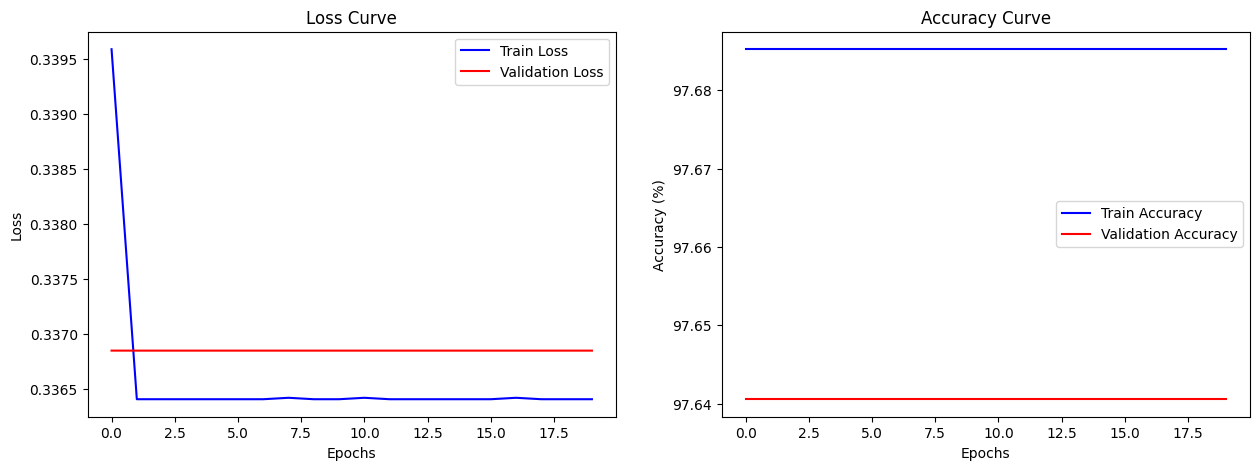

In [ ]:
plot_performance(train_losses_selected_ga, val_losses_selected_ga, train_acc_selected_ga, val_acc_selected_ga)


--- Evaluation Metrics ---
Test Loss: 0.3367
Test Accuracy: 0.9766
Precision: 0.9766
Recall: 1.0000
F1 Score: 0.9881

--- Error Metrics ---
Mean Absolute Error (MAE): 0.0234
Mean Squared Error (MSE): 0.0234
Root Mean Squared Error (RMSE): 0.1531
Mean Absolute Percentage Error (MAPE): 0.00%

--- System Resource Utilization ---
CPU Utilization: 2.5%
Memory Usage: 4736688.00 KB

--- Classification Report ---


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00     11351
        DDoS       0.98      1.00      0.99    472904

    accuracy                           0.98    484255
   macro avg       0.49      0.50      0.49    484255
weighted avg       0.95      0.98      0.96    484255



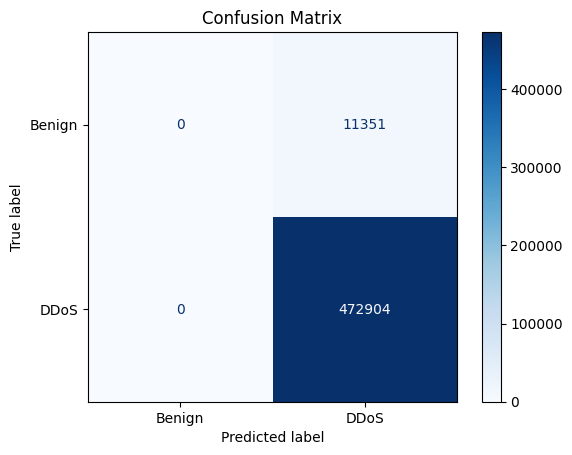

In [ ]:
evaluate_model(model_selected_ga, test_loader_selected_ga)

### LIME for DNN-BiLSTM with All Features

In [ ]:
explainer1 = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names=X.columns.tolist(),
                                                   mode='classification',
                                                   discretize_continuous=True)

In [ ]:
i = 10
exp1 = explainer1.explain_instance(
    data_row=X_test[i],
    predict_fn=model.predict_proba,
    num_features=X_train.shape[1]
)

In [ ]:
y_test_selected_ga[i]

1

In [ ]:
exp1.show_in_notebook(show_table=True, show_predicted_value=True)

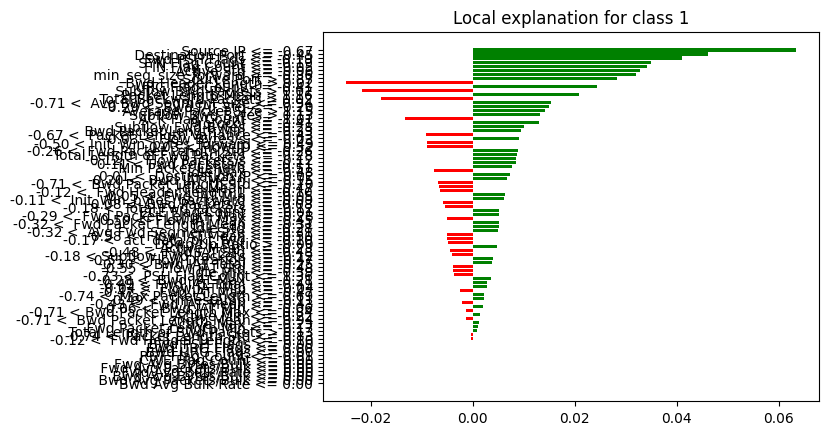

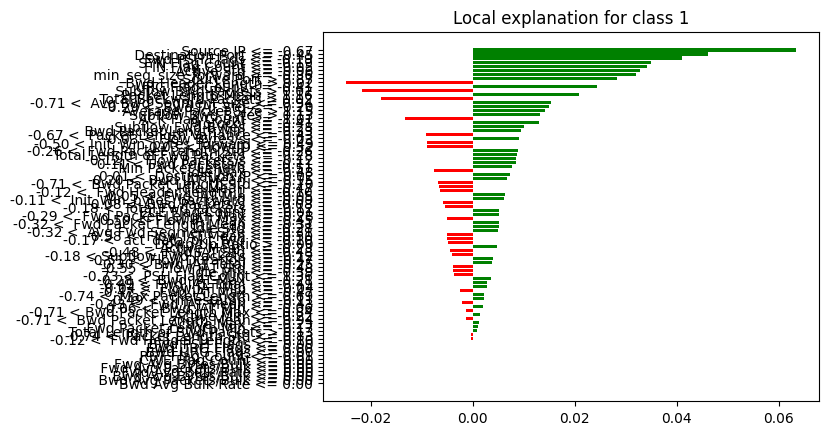

In [ ]:
exp1.as_pyplot_figure()

In [ ]:
feature_contributions1 = exp1.as_map()[1]
print("Feature Contributions (index-based):", feature_contributions1)

Feature Contributions (index-based): [(1, 0.0634722433798905), (4, 0.04615963238312354), (36, 0.040999310042181235), (50, 0.03499246109686121), (49, 0.034140927675673685), (77, 0.03285124807958949), (75, 0.03208102314335517), (2, 0.02838948192835948), (41, -0.02493392064545968), (54, 0.024446724110987552), (70, -0.021790250316085714), (46, 0.02076416819141593), (9, -0.018011251738043143), (60, 0.015287259349466061), (33, 0.014976241359407514), (58, 0.014095472822733638), (71, 0.01325127243900773), (53, -0.01317448305741096), (5, 0.012937744788688699), (69, 0.010073982741273111), (17, 0.00949131570918121), (48, -0.009208672728184715), (20, 0.009076959434528445), (72, -0.009047425032759866), (0, -0.009015725618775628), (15, 0.00883431338911275), (10, 0.008774644652124896), (21, 0.00844779007660262), (42, 0.008424145433987578), (44, 0.007778941112206511), (82, -0.007511409534349888), (3, 0.007368746701754872), (32, 0.006790626829218945), (19, -0.006710948546169444), (80, -0.00664263208069

### LIME for DNN-BiLSTM with GA Features

In [ ]:
explainer2 = lime.lime_tabular.LimeTabularExplainer(X_train_selected_ga,
                                                   feature_names=X_selected_ga,
                                                   mode='classification',
                                                   discretize_continuous=True)

In [ ]:
j=10
exp2 = explainer2.explain_instance(
    data_row=X_test_selected_ga[j],
    predict_fn=model_selected_ga.predict_proba,
    num_features=X_train_selected_ga.shape[1]
)

In [ ]:
exp2.show_in_notebook(show_table=True, show_predicted_value=True)

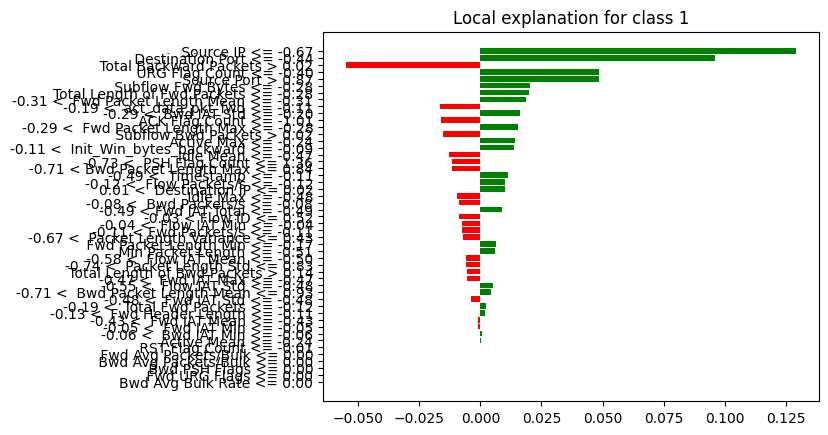

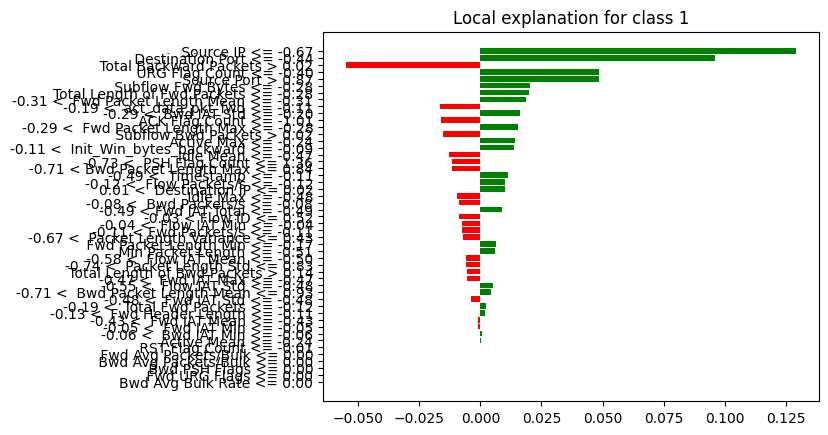

In [ ]:
exp2.as_pyplot_figure()

In [ ]:
feature_contributions2 = exp2.as_map()[1]
print("Feature Contributions (index-based):", feature_contributions2)

Feature Contributions (index-based): [(1, 0.12926204323660295), (4, 0.09584433257410888), (7, -0.0551292947800664), (37, 0.04854348249773819), (2, 0.04838652620711322), (41, 0.0202015928638809), (8, 0.019722808408794514), (12, 0.018554262466038172), (44, -0.016390869705980603), (24, 0.016376762697837263), (36, -0.01598476317710737), (10, 0.015457057085614965), (42, -0.015373092540240892), (46, 0.014275650137156171), (43, 0.013624229375903933), (47, -0.012639680905725715), (35, -0.011736257878972617), (13, -0.011447594179137748), (5, 0.011345984171872549), (15, 0.010048408169583384), (3, 0.009888290495396211), (48, -0.009651063774002688), (30, -0.008684090690883392), (19, 0.008674612893283681), (0, -0.008630029962591507), (18, -0.007599936602001052), (29, -0.007332400227065237), (33, -0.0070999254134755455), (11, 0.006468832542033772), (31, 0.006110343434762353), (16, -0.006060983445694473), (32, -0.005812375698678813), (9, -0.005332392605660137), (22, -0.005296378519426009), (17, 0.005

Model Size

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/research_paper/ciciomt_model.pth')

model_size1 = os.path.getsize('/content/drive/MyDrive/research_paper/ciciomt_model.pth') / 1024
print(f"Model Size: {model_size1:.2f} KB")

Model Size: 321.09 KB


In [ ]:
torch.save(model_selected_ga.state_dict(), '/content/drive/MyDrive/research_paper/ciciomt_ga_model.pth')

model_size_ga = os.path.getsize('/content/drive/MyDrive/research_paper/ciciomt_ga_model.pth') / 1024
print(f"Model Size: {model_size_ga:.2f} KB")

Model Size: 311.64 KB


### Dynamic Quantization model

In [ ]:
import torch.quantization
quantized_model_ga = torch.quantization.quantize_dynamic(
    model_selected_ga,
    {nn.LSTM},
    dtype=torch.qint8
)


--- Evaluation Metrics ---
Test Loss: 0.3367
Test Accuracy: 0.9766
Precision: 0.9766
Recall: 1.0000
F1 Score: 0.9881

--- Error Metrics ---
Mean Absolute Error (MAE): 0.0234
Mean Squared Error (MSE): 0.0234
Root Mean Squared Error (RMSE): 0.1531
Mean Absolute Percentage Error (MAPE): 0.00%

--- System Resource Utilization ---
CPU Utilization: 3.0%
Memory Usage: 4740812.00 KB

--- Classification Report ---


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00     11351
        DDoS       0.98      1.00      0.99    472904

    accuracy                           0.98    484255
   macro avg       0.49      0.50      0.49    484255
weighted avg       0.95      0.98      0.96    484255



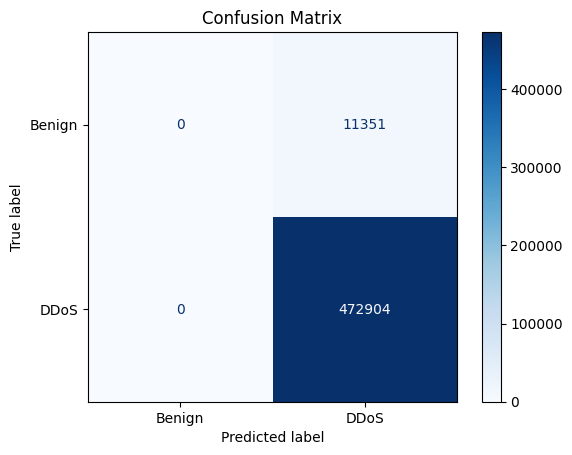

In [ ]:
evaluate_model(quantized_model_ga, test_loader_selected_ga)

In [ ]:
torch.save(quantized_model_ga.state_dict(), '/content/drive/MyDrive/research_paper/ciciomt_ga_quantised_model.pth')

quantized_ga_size = os.path.getsize('/content/drive/MyDrive/research_paper/ciciomt_ga_quantised_model.pth') / 1024
print(f"Model Size: {quantized_ga_size:.2f} KB")

Model Size: 120.63 KB
